### 1. Data preparation

In [153]:
import pandas as pd

# Load data
checkin_data = pd.read_csv("../data/_raw/checkin_checkout_history_updated.csv", parse_dates= ['checkin_time', 'checkout_time'])
gym_data = pd.read_csv("../data/_raw/gym_locations_data.csv")
user_data = pd.read_csv("../data/_raw/users_data.csv")

workout_data = checkin_data.merge(user_data[['user_id', 'age', 'gender']], on='user_id', how='left')
workout_data = workout_data.merge(gym_data[['gym_id', 'gym_type']], on='gym_id', how='left')
workout_data = workout_data.merge(user_data[['user_id','subscription_plan']], on='user_id', how='left')
workout_data['age_group'] = pd.cut(
    workout_data['age'],
    bins=[0, 18, 30, 60, 65],
    labels=['Teen', 'Young Adult', 'Adult', 'Senior'],
    include_lowest=True,
    ordered=False
)

### 2. Standardizing the data

In [154]:
from sklearn.preprocessing import LabelEncoder

workout_label_encoder = LabelEncoder()
gender_label_encoder = LabelEncoder()
age_group_label_encoder = LabelEncoder()
subscription_label_encoder = LabelEncoder()

workout_data['workout_type_standardized'] = workout_label_encoder.fit_transform(workout_data['workout_type'])
workout_data['gender_standardized'] = gender_label_encoder.fit_transform(workout_data['gender'])
workout_data['age_group_standardized'] = age_group_label_encoder.fit_transform(workout_data['age_group'])
workout_data['subscription_standardized'] = subscription_label_encoder.fit_transform(workout_data['gym_type'])

### 3. Data Split

Splitting data into test and training data

In [155]:
from sklearn.model_selection import train_test_split

# Define variables and target
X = workout_data[['age_group_standardized', 'gender_standardized', 'subscription_standardized']]
y = workout_data['workout_type_standardized']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classification

Logistic Regression Classification is a statistical algorithm.
It is a binary classification, evaluation the accucary of the prediction model by determining True Positives (TP), True Negative (TN), False Positives (FP) and False Negatives (FN)

Logistic Regression Accuracy: 0.16841666666666666


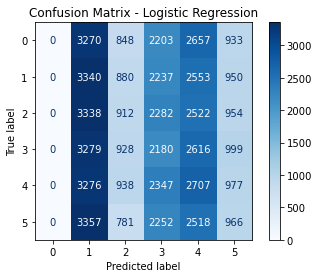

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Logistic Regression model for comparison
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Confusion matrix
unique_labels = sorted(set(y_test))
confusion_matrix = confusion_matrix(y_test, y_pred_logistic, labels=unique_labels)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)
display.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix shows the performance of the logistic regression in predicting workout types based on age and gender.
The model isn't good at differentiating between the workout types effectively. 

# Decision Tree Classification

In [157]:
xaxis_dict = {0: ['Adult', 'Senior', 'Young Adult', 'Teen']}
yaxis_dict = {0: ["Female", "Male", "Non-binary"],
              1: ["Pro", "Basic", "Student"]}

Decision Tree Accuracy: 0.16813333333333333
Decision Tree Accuracy: 0.16876666666666668


/var/folders/fl/wzg89bnx73b6x869j7mkd4lh0000gn/T/ipykernel_7535/99352179.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.4, 1, 1.5])  # Adjust layout to make space for colorbar and title


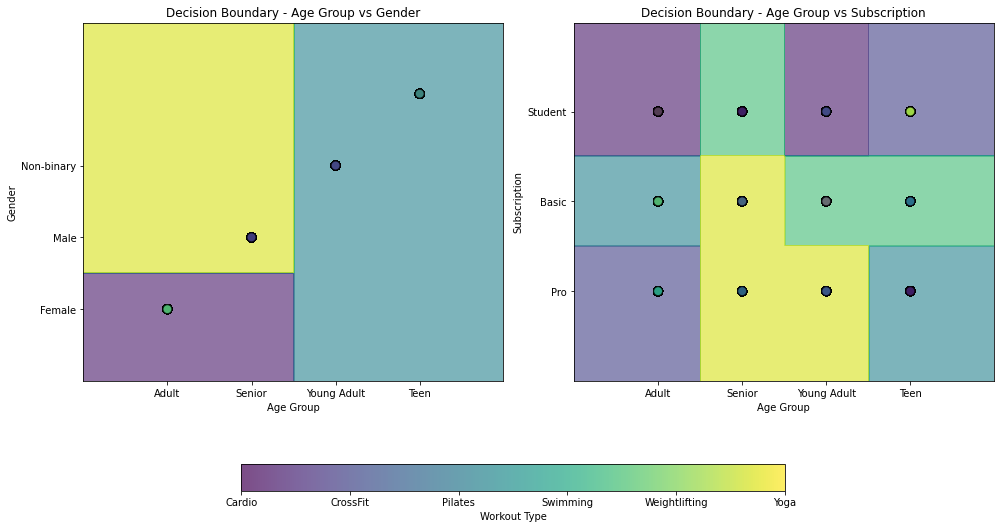

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

###################################################### AGE VS GENDER ######################################################
var1, var2 = 0, 0  # Index for 'Age Group' and 'Gender'
X_train_pair = X_train.iloc[:, [var1, var2]].values
X_test_pair = X_test.iloc[:, [var1, var2]].values

# Train the decision tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_pair, y_train)

# Create mesh grid boundaries
x_min, x_max = X_train_pair[:, 0].min() - 1, X_train_pair[:, 0].max() + 1
y_min, y_max = X_train_pair[:, 1].min() - 1, X_train_pair[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Evaluate Decision Tree
y_pred_tree = tree_model.predict(X_test_pair)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Predict on the mesh grid
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
axes[0].contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.viridis)

# Scatter plot for prediction data
scatter = axes[0].scatter(X_test_pair[:, 0], X_test_pair[:, 1], c=y_test, cmap=plt.cm.viridis, edgecolor='k', s=80, alpha=0.7)

# Set labels and titles
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Gender')
axes[0].set_title(f"Decision Boundary - Age Group vs Gender")

axes[0].set_xticks([idx for idx in range(len(xaxis_dict[var1]))]) 
axes[0].set_xticklabels(xaxis_dict[var1]) 
axes[0].set_yticks([idx for idx in range(len(yaxis_dict[var2]))]) 
axes[0].set_yticklabels(yaxis_dict[var2])

###################################################### AGE VS SUBSCRIPTION ######################################################
var1, var2 = 0, 1  # Index for 'Age Group' and 'Gender'
X_train_pair = X_train.iloc[:, [var1, var2]].values
X_test_pair = X_test.iloc[:, [var1, var2]].values

# Train the decision tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_pair, y_train)

# Create mesh grid
x_min, x_max = X_train_pair[:, 0].min() - 1, X_train_pair[:, 0].max() + 1
y_min, y_max = X_train_pair[:, 1].min() - 1, X_train_pair[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Evaluate Decision Tree
y_pred_tree = tree_model.predict(X_test_pair)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Predict on the mesh grid
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
axes[1].contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.viridis)

# Scatter plot for prediction data
scatter = axes[1].scatter(X_test_pair[:, 0], X_test_pair[:, 1], c=y_test, cmap=plt.cm.viridis, edgecolor='k', s=80, alpha=0.7)

# Set labels and titles
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Subscription')
axes[1].set_title(f"Decision Boundary - Age Group vs Subscription")

axes[1].set_xticks([idx for idx in range(len(xaxis_dict[var1]))]) 
axes[1].set_xticklabels(xaxis_dict[var1]) 
axes[1].set_yticks([idx for idx in range(len(yaxis_dict[var2]))]) 
axes[1].set_yticklabels(yaxis_dict[var2])

# Add a colorbar below the plots
workout_labels = workout_label_encoder.inverse_transform(np.unique(workout_data['workout_type_standardized']))
colorbar_new = fig.colorbar(scatter, ax=axes, orientation='horizontal', pad=0.2, fraction=0.1)
colorbar_new.set_ticks(range(len(workout_labels)))
colorbar_new.ax.set_xticklabels(workout_labels)
colorbar_new.set_label("Workout Type")

plt.tight_layout(rect=[0, 0.4, 1, 1.5])  # Adjust layout to make space for colorbar and title
plt.show()
plt.show()

The decision tree predicts for each "case", what workout category they are classified into.
E.g. a teen female is categorized into the pilates category, while an adult male is categorized into a combination of yoga and weightlifting. 